# 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import imageio

import numpy as np 
import pandas as pd 
import nibabel as nib
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image
from matplotlib.pyplot import figure

from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

# 2. Data Preparation

In [2]:
# Create a meta file for nii files processing

file_list = []
for dirname, _, filenames in os.walk(r'C:\Users\DELL\Desktop\liver cancer data\data'):
    for filename in filenames:
        file_list.append((dirname, filename)) 


df_files = pd.DataFrame(file_list, columns =['dirname', 'filename']) 
df_files.sort_values(by=['filename'], ascending=True)   

,dirname,filename
0,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt1,volume-0.nii
1,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt1,volume-1.nii
2,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt1,volume-10.nii
11,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-11.nii
12,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-12.nii
13,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-13.nii
14,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-14.nii
15,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-15.nii
16,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-16.nii
17,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-17.nii


In [3]:
# Map CT scan and label 


df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = r'C:\Users\DELL\Desktop\liver cancer data\segmentations'

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 

df_files

,dirname,filename,mask_dirname,mask_filename
0,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt1,volume-0.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-0.nii
1,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt1,volume-1.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-1.nii
2,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt1,volume-10.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-10.nii
3,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-11.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-11.nii
4,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-12.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-12.nii
5,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-13.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-13.nii
6,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-14.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-14.nii
7,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-15.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-15.nii
8,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-16.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-16.nii
9,C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2,volume-17.nii,C:\Users\DELL\Desktop\liver cancer data\segmentations,segmentation-17.nii


# 3. Data Preprocessing

In [4]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [5]:
# Read sample

sample = 40
sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])

print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 74)
Mask Shape: (512, 512, 74)


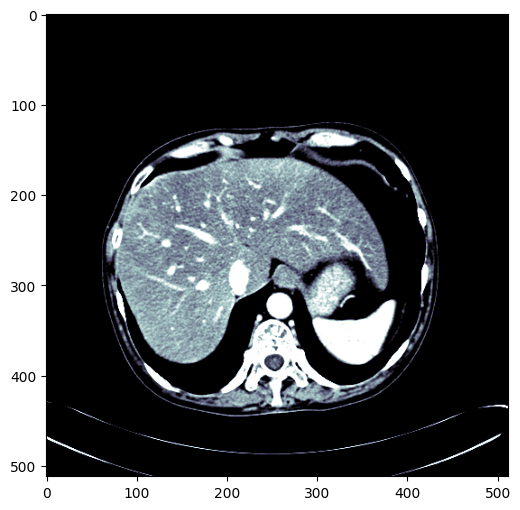

In [6]:
# Preprocess the nii file 
# Source https://docs.fast.ai/medical.imaging

dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)

plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

# Data Visualization
## Display Sample Images

In [7]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')
             
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')
    
    plt.show()

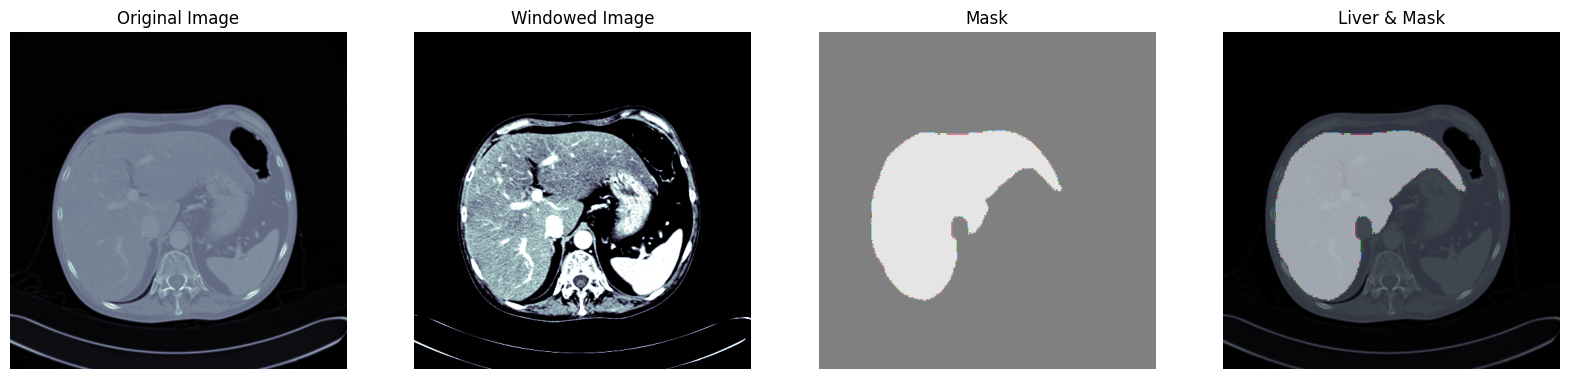

In [8]:
sample = 45

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

<Axes: >

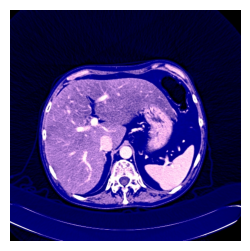

In [9]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'} #a subclass of a PyTorch Tensor designed to handle black-and-white images.

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120): #unction to convert the tensor to a multi-channel image suitable for saving as a JPG.The image is saved with the specified quality.
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

# 4. Generate Training Image From 'nii' File

In [10]:
from sklearn.model_selection import train_test_split

GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    # Split the data into train and test sets
    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)

    # Check if train_df is empty
    print("Length of train_df:", len(train_df))

    # Reset index for contiguous indices
    train_df = train_df.reset_index(drop=True)
    # Check if test_df is empty
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    # Loop for training set
    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    ### test image save
    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  # read jpg from saved kernel output

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

## 4.1 - Check Data

In [11]:
print("\nFirst few rows of Training Set:")
print(train_df.head())

print("\nFirst few rows of Testing Set:")
print(test_df.head())


First few rows of Training Set:
                                                   dirname       filename  \
0  C:\Users\DELL\Desktop\liver cancer data\data\volume_pt3  volume-24.nii   
1  C:\Users\DELL\Desktop\liver cancer data\data\volume_pt4  volume-38.nii   
2  C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2  volume-11.nii   
3  C:\Users\DELL\Desktop\liver cancer data\data\volume_pt4  volume-36.nii   
4  C:\Users\DELL\Desktop\liver cancer data\data\volume_pt2  volume-20.nii   

                                            mask_dirname        mask_filename  
0  C:\Users\DELL\Desktop\liver cancer data\segmentations  segmentation-24.nii  
1  C:\Users\DELL\Desktop\liver cancer data\segmentations  segmentation-38.nii  
2  C:\Users\DELL\Desktop\liver cancer data\segmentations  segmentation-11.nii  
3  C:\Users\DELL\Desktop\liver cancer data\segmentations  segmentation-36.nii  
4  C:\Users\DELL\Desktop\liver cancer data\segmentations  segmentation-20.nii  

First few rows of Testi

In [12]:
print("\ntrain df data shape:")
print(train_df.shape)


train df data shape:
(45, 4)


In [13]:
print("\ntest df data shape:")
print(test_df.shape)


test df data shape:
(6, 4)


# 5. Resizing Images

In [14]:
# Set the directories
train_images_dir = r'C:\Users\DELL\Desktop\liver cancer data\train_images'
train_masks_dir = r'C:\Users\DELL\Desktop\liver cancer data\train_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(train_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing nd converted to numpy arrays
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks 
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays  for further processing
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Normalize images to [0, 1]
train_images =train_images / 255.0

# Reshape masks to include a channel dimension
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [15]:
# Set the directories
test_images_dir = r'C:\Users\DELL\Desktop\liver cancer data\test_images'
test_masks_dir = r'C:\Users\DELL\Desktop\liver cancer data\test_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(test_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize
                        (target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize
                       (target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_masks = np.array(test_masks)

# Normalize images to [0, 1]
test_images =test_images / 255.0

# Reshape masks to include a channel dimension
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [16]:
print(f"Train image ={len(train_images)} Test image={len(test_images)}")
print(f"Train mask ={len(train_masks)}  Test mask={len(test_masks)}")

Train image =8556 Test image=699
Train mask =8556  Test mask=699


In [17]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

In [18]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


## 6.2  Display Random Images and Masks

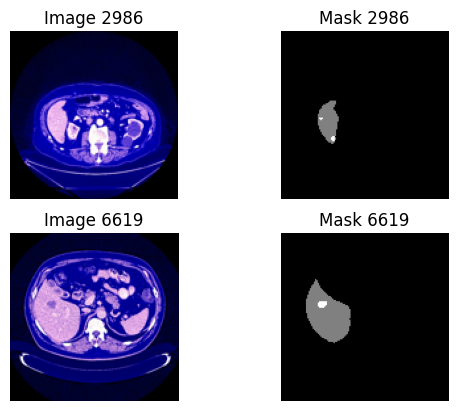

In [19]:
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select 'num_samples' number of indices from the available images.
    sample_indices = random.sample(range(images.shape[0]), num_samples)
    
    # Loop through each sample.
    for i in range(num_samples):
        index = sample_indices[i]  # Get the index of the current sample.
        
        #  Display the image.
        plt.subplot(num_samples, 2, 2 * i + 1)  # Prepare a subplot.
        plt.imshow(images[index])  # Show the image at the selected index.
        plt.title("Image {}".format(index))  # Set the title for the image.
        plt.axis("off")  # Turn off the axis.
        
        #  Display the corresponding mask.
        plt.subplot(num_samples, 2, 2 * i + 2)  # Prepare the next subplot.
        plt.imshow(masks[index].squeeze(), cmap='gray')  # Show the mask with a grayscale colormap.
        plt.title("Mask {}".format(index))  # Set the title for the mask.
        plt.axis("off")  # Turn off the axis.
    
    # Display all the subplots.
    plt.show()

# Display two random images and masks
display_images_and_masks(train_images, train_masks)

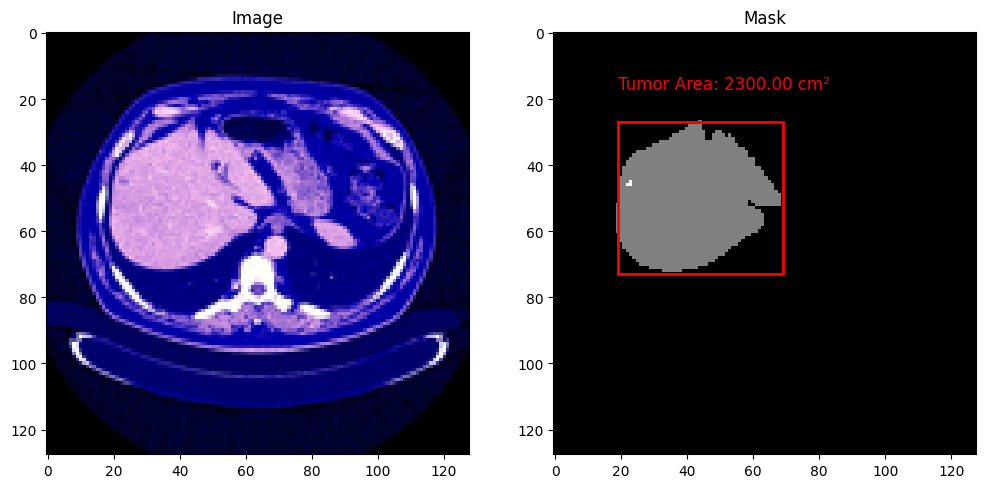

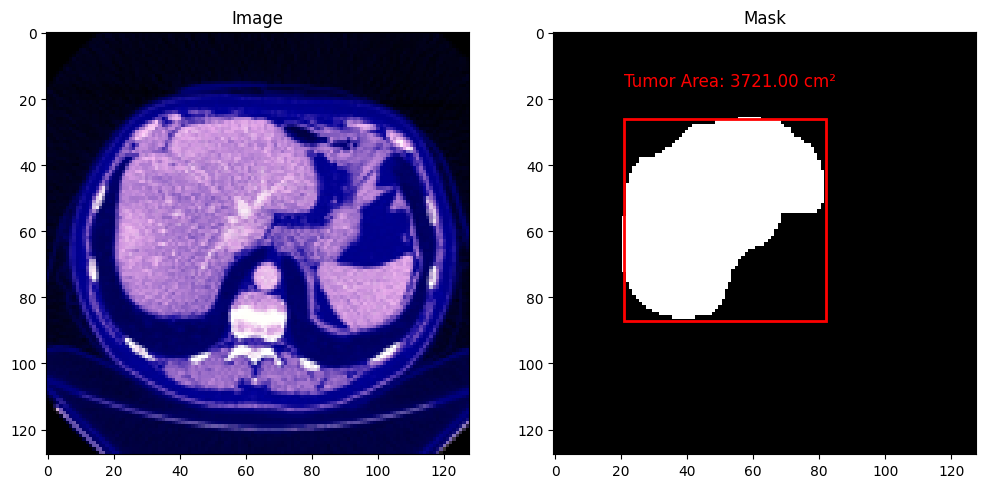

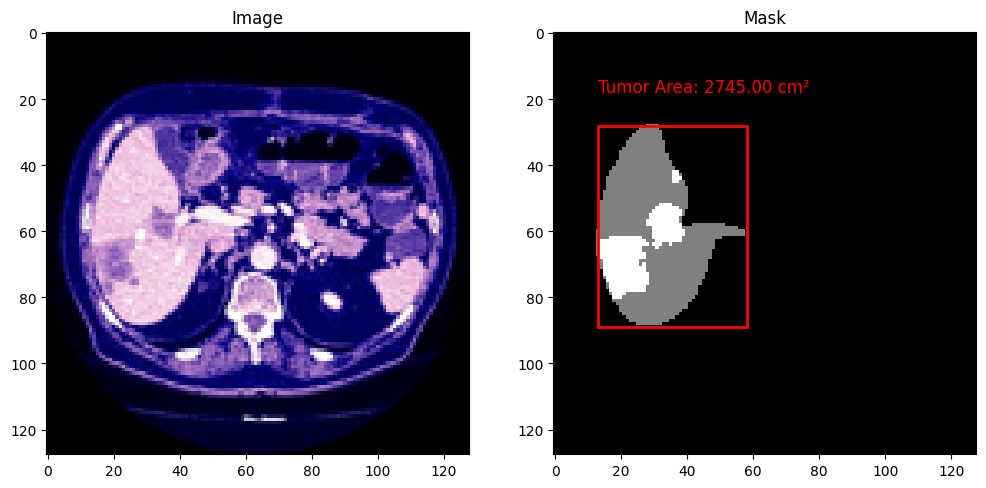

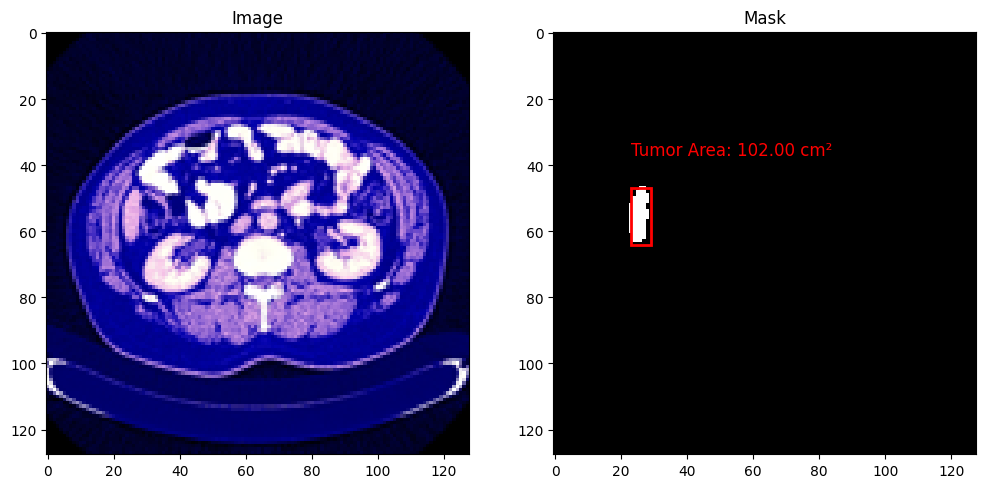

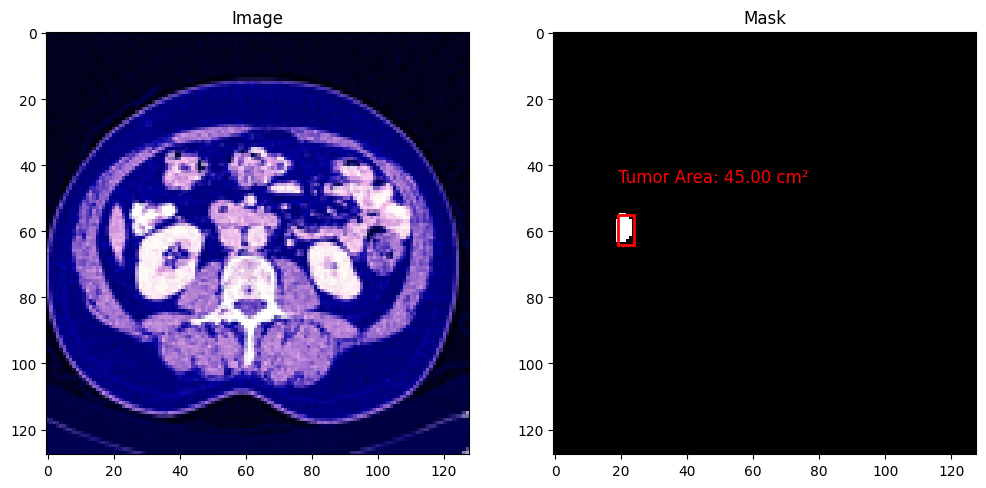

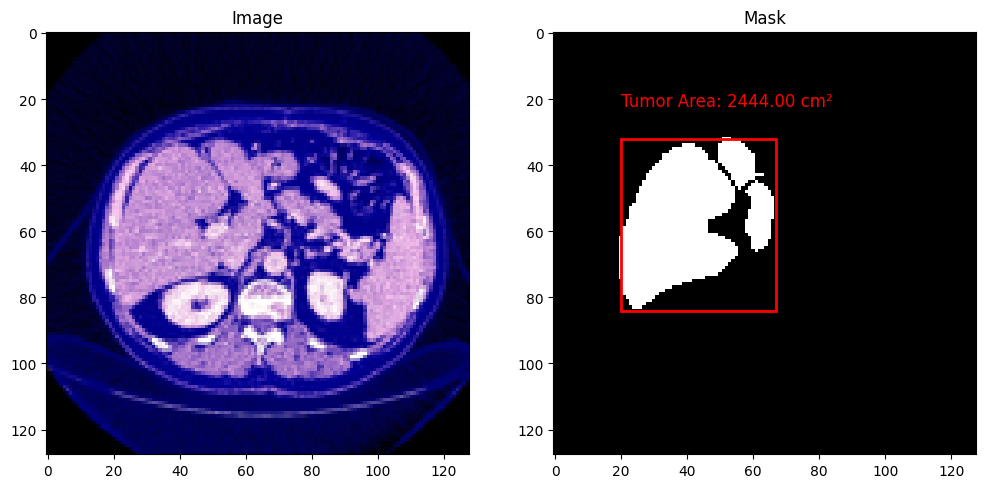

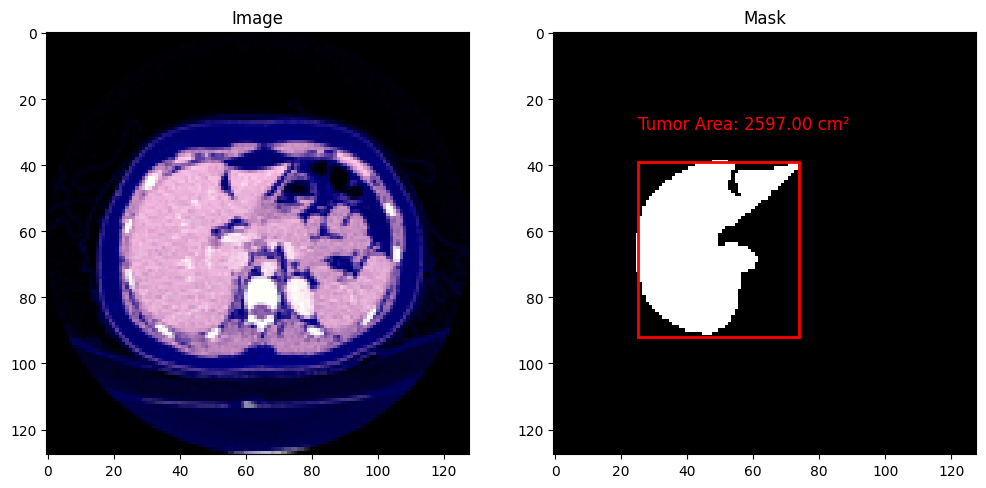

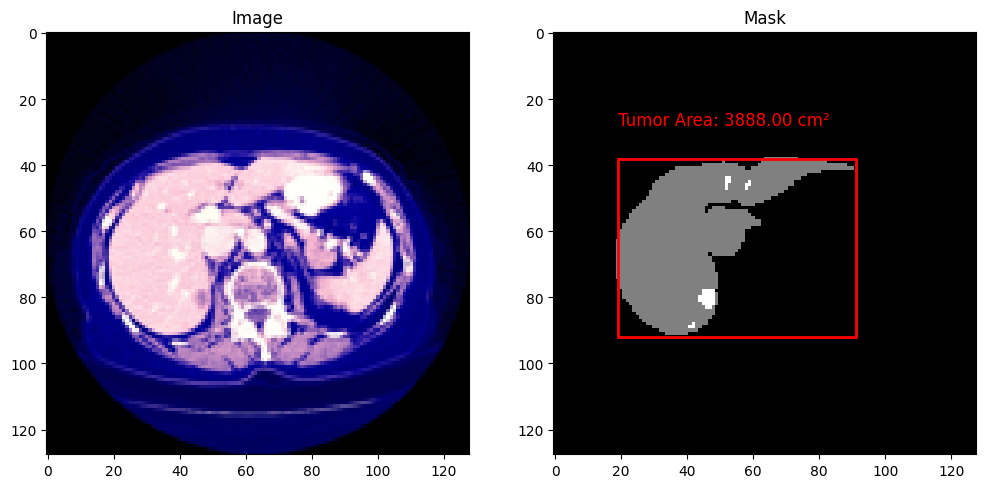

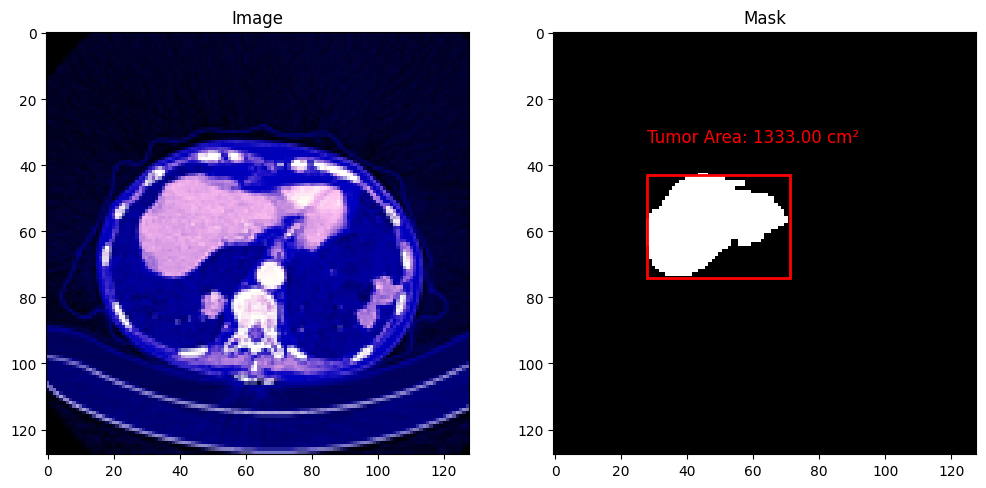

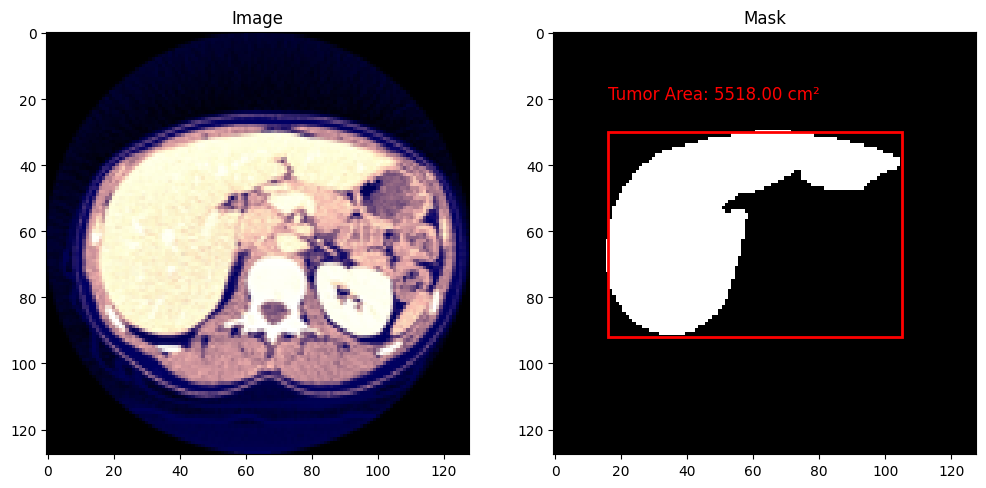

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_images_and_masks(images, masks, num_samples=2, pixel_to_cm_ratio=1.0):
    # Randomly select 'num_samples' indices
    random_indices = np.random.choice(len(images), num_samples, replace=False)
    
    for i in random_indices:
        img = images[i]  # Get the i-th image
        mask = masks[i]  # Get the corresponding mask
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Check if any contours are found
        if contours:
            # Find the bounding box for the largest contour (assuming it's the tumor)
            contour = max(contours, key=cv2.contourArea)
            
            # Calculate bounding box coordinates
            x, y, w, h = cv2.boundingRect(contour)
            
            # Visualize the image and mask
            fig, ax = plt.subplots(1, 2, figsize=(12, 6))
            ax[0].imshow(img)
            ax[0].set_title('Image')
            ax[1].imshow(mask, cmap='gray')
            ax[1].set_title('Mask')
            
            # Draw the bounding box around the tumor in the mask
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
            ax[1].add_patch(rect)
            
            # Display the area in square cm
            tumor_area_pixels = w * h
            tumor_area_cm = tumor_area_pixels * (pixel_to_cm_ratio ** 2)  # Convert to square cm
            ax[1].text(x, y - 10, f'Tumor Area: {tumor_area_cm:.2f} cm²', color='red', fontsize=12)
        
        plt.show()

# Example of how to call the function:
# Assuming train_images and train_masks are loaded as numpy arrays
display_images_and_masks(train_images, train_masks, num_samples=20)  


# 7. Model Training

## 7.1 - ResNet50 Model

In [21]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [45]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [46]:
# Step 1: Build the model (using your custom build_model function)
def build_model(input_shape=(128, 128, 3), num_classes=1):
    # Load the ResNet50 model with pre-trained weights and exclude top layers
    input_tensor = Input(shape=input_shape)  # Use Input(shape) explicitly
    base_model = ResNet50(include_top=False, input_tensor=input_tensor)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Custom segmentation head
    x = base_model.output

    # Upsampling and adding convolutional layers with regularization and dropout
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Final output layer with sigmoid activation for binary segmentation (for num_classes=1)
    x = Conv2D(num_classes, (1, 1), activation='sigmoid')(x)

    # Create and compile the model
    model = Model(inputs=input_tensor, outputs=x)  # Pass input_tensor explicitly
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [47]:
# Step 2: Prepare your dataset (assuming test_images and test_masks are already defined)
# Example: Split the data
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

# Step 3: Data Augmentation for the training data
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should not be augmented
validation_datagen = ImageDataGenerator()

# Fit the generator to your data
train_generator = train_datagen.flow(x_valid, y_valid, batch_size=32)
validation_generator = validation_datagen.flow(x_test, y_test, batch_size=32)


In [48]:
# Step 4: Build the model
model = build_model(input_shape=(128, 128, 3), num_classes=1)  # Modify if needed


In [49]:
# Step 5: Set up early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [50]:
# Step 6: Train the model with the augmented data
history = model.fit(
    train_generator, 
    epochs=50, 
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.4947 - loss: 0.9521 - val_accuracy: 0.7794 - val_loss: 0.6175 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.6169 - loss: 0.7594 - val_accuracy: 0.6897 - val_loss: 0.7971 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.7407 - loss: 0.6961 - val_accuracy: 0.4885 - val_loss: 1.1845 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.8477 - loss: 0.6353 - val_accuracy: 0.7779 - val_loss: 0.6023 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9042 - loss: 0.5851 - val_accuracy: 0.8538 - val_loss: 0.5871 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9259 - loss: 0.5405 - val_accuracy: 0.8670 - val_loss: 0.6272 - learning_rate: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9389 - loss: 0.4926 - val_accuracy: 

## 7.2 Train the Model

*'train_images' are the input images for training.*

*train_masks' are the corresponding ground truth masks for the input images.*

*'batch_size' is set to 32, meaning the model will update weights after every 32 samples.*

*'epochs' is set to 10, meaning the model will go through the entire dataset 10 times.* 

*'validation_data' is a tuple containing the validation dataset and its corresponding masks.*

*The model's performance is evaluated on this validation dataset after each epoch.*
poch.

In [51]:
def plot_history(history):
    # Plot the training loss values
    plt.plot(history.history['loss'])
    # Plot the validation loss values
    plt.plot(history.history['val_loss'])
    # Set the title of the plot to 'Model loss'
    plt.title('Model loss')
    # Set the y-axis label of the plot to 'Loss'
    plt.ylabel('Loss')
    # Set the x-axis label of the plot to 'Epoch'
    plt.xlabel('Epoch')
    # Add a legend to the plot with labels 'Train' for training loss and 'Validation' for validation loss
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Display the plot
    plt.show()

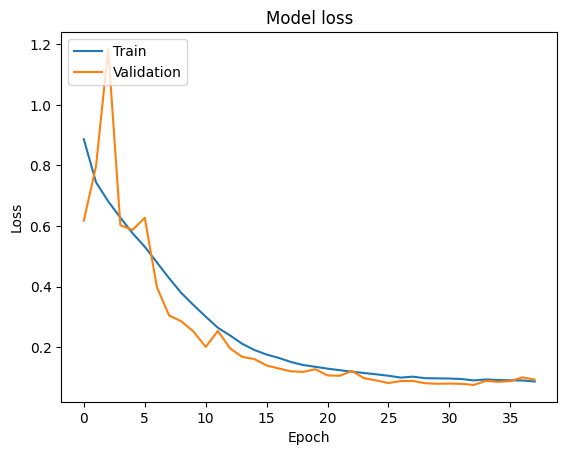

In [52]:
# Plotting the loss curve
plot_history(history)

In [53]:
def plot_history(history):
    # Plot the training loss values
    plt.plot(history.history['accuracy'])
    # Plot the validation loss values
    plt.plot(history.history['val_accuracy'])
    # Set the title of the plot to 'Model loss'
    plt.title('Model loss')
    # Set the y-axis label of the plot to 'Loss'
    plt.ylabel('Loss')
    # Set the x-axis label of the plot to 'Epoch'
    plt.xlabel('Epoch')
    # Add a legend to the plot with labels 'Train' for training loss and 'Validation' for validation loss
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Display the plot
    plt.show()

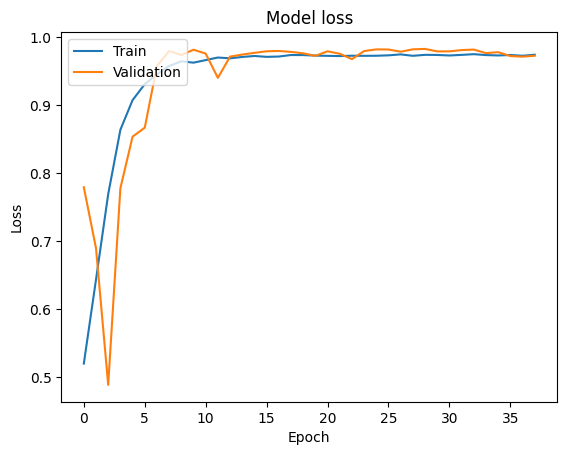

In [54]:
# Plotting the accuracy curve
plot_history(history)

# 8. Model Evaluation

In [55]:
# Evaluate the model using the validation dataset.
# 'x_valid' are the input images for validation.
# 'y_valid' are the corresponding ground truth masks for the validation images.
scores = model.evaluate(x_valid, y_valid)

# 'scores' is a list containing the loss as the first element and the accuracy as the second element.
# By accessing 'scores[1]', we retrieve the accuracy of the model on the validation dataset.
accuracy = scores[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 879ms/step - accuracy: 0.9836 - loss: 0.0707


In [56]:
print("Validation Accuracy: ", accuracy)

Validation Accuracy:  0.9829376339912415


In [66]:
prediction = model.predict(x_test)# Use the trained model to make predictions on the test dataset.

# 'x_test' contains the input images for testing.
prediction = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 840ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 851ms/step


In [57]:
# Evaluate the model using the test data (x_test, y_test)
test_scores = model.evaluate(x_test, y_test)

# test_scores is a list that contains the loss as the first element and the accuracy as the second element.
# Here, we are accessing the second element, which is the accuracy of the model on the test data.
accuracy = test_scores[1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 826ms/step - accuracy: 0.9804 - loss: 0.0777


In [58]:
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9819642305374146


In [73]:
# Save the model to a file (in .keras format)
model.save('cancer_detection_model.keras')

print("Model saved successfully!")


Model saved successfully!


In [74]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('cancer_detection_model.keras')

print("Model loaded successfully!")


Model loaded successfully!


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# 9. Making Final Prediction 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Mask Output Shape:  (1, 128, 128, 1)
Predicted Mask:  [[[[0.0205602 ]
   [0.01578657]
   [0.0158571 ]
   ...
   [0.01613235]
   [0.01589119]
   [0.02216204]]

  [[0.01503759]
   [0.01077384]
   [0.01105958]
   ...
   [0.01150794]
   [0.01125944]
   [0.01695691]]

  [[0.01506404]
   [0.01082933]
   [0.01114355]
   ...
   [0.01166242]
   [0.01152566]
   [0.01735347]]

  ...

  [[0.01529831]
   [0.01131718]
   [0.01154045]
   ...
   [0.01235478]
   [0.01249983]
   [0.01918112]]

  [[0.0154181 ]
   [0.01131379]
   [0.01157439]
   ...
   [0.01299492]
   [0.01320198]
   [0.01923855]]

  [[0.01995861]
   [0.01706102]
   [0.01723905]
   ...
   [0.01880892]
   [0.01880427]
   [0.02499417]]]]


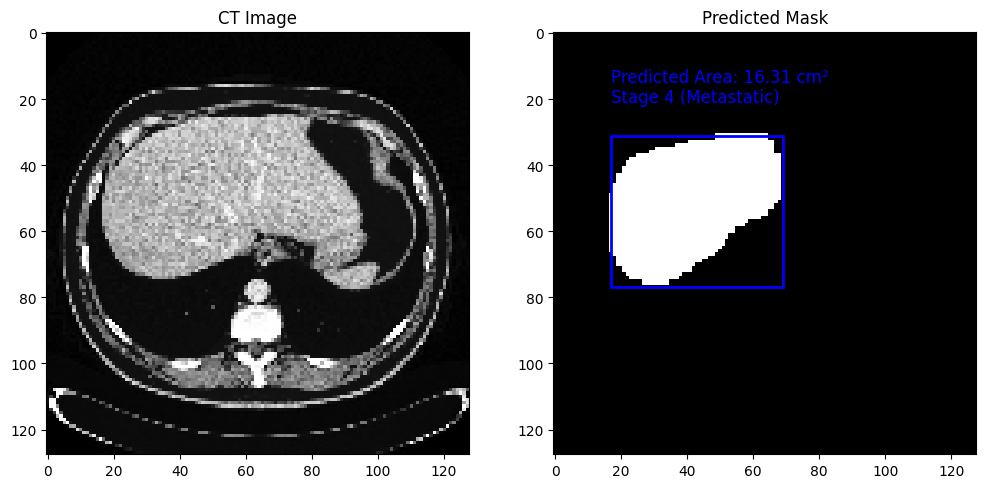

Tumor Area: 1709 pixels
Cancer Stage: Stage 4 (Metastatic)


In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tkinter import Tk, filedialog
import os

# Load the pre-trained model
model = load_model('cancer_detection_model.keras')

# Function to allow user to select a CT image from their computer
def select_ct_image():
    root = Tk()
    root.withdraw()  # Hide the root window
    
    # Ask the user to select a CT image
    ct_image_path = filedialog.askopenfilename(
        title="Select a CT image",
        filetypes=[("Image files", "*.png;*.jpg;*.jpeg;*.tiff;*.dcm"), ("All files", "*.*")]
    )
    
    if not ct_image_path:  # Handle if no file is selected
        print("No CT image selected.")
        return None
    
    # Check if the CT image exists
    if not os.path.exists(ct_image_path):
        print(f"File not found: {ct_image_path}")
        return None
    
    # Load the CT image
    ct_image = cv2.imread(ct_image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    if ct_image is None:
        print("Failed to load CT image. Please check the file format.")
        return None
    
    # Ensure the image is the correct shape for the model (e.g., 128x128)
    ct_image = cv2.resize(ct_image, (128, 128))  # Resize to match model input size
    
    # Convert grayscale CT image to 3 channels (if needed)
    ct_image = cv2.cvtColor(ct_image, cv2.COLOR_GRAY2RGB)
    
    return ct_image

# Function to preprocess the CT image and predict the mask using the model
def predict_mask(ct_image):
    # Ensure the image is the correct shape
    ct_image = ct_image.astype(np.float32) / 255.0  # Normalize image to [0, 1]
    
    # Add batch dimension (e.g., [1, 128, 128, 3] for RGB image)
    ct_image = np.expand_dims(ct_image, axis=0)

    # Predict mask
    predicted_mask = model.predict(ct_image)
    
    # Debugging output
    print("Predicted Mask Output Shape: ", predicted_mask.shape)  # Check the shape
    print("Predicted Mask: ", predicted_mask)  # Print the raw output
    
    # Squeeze to remove batch dimension
    predicted_mask = np.squeeze(predicted_mask, axis=0)
    
    # Apply threshold to get binary mask
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)
    
    return predicted_mask

def post_process_mask(predicted_mask):
    """Apply morphological operations to remove noise and fill small holes in the predicted mask."""
    # Perform morphological closing (dilate, then erode) to fill holes in the mask
    kernel = np.ones((5, 5), np.uint8)
    mask_closed = cv2.morphologyEx(predicted_mask, cv2.MORPH_CLOSE, kernel)
    
    # Perform morphological opening (erode, then dilate) to remove small noise
    mask_opened = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
    
    return mask_opened

# Function to calculate tumor area from the mask
def calculate_tumor_area(mask):
    """Calculate the tumor area from the binary mask"""
    tumor_pixels = np.sum(mask > 0)  # Count non-zero pixels in the mask
    return tumor_pixels

# Function to predict cancer stage based on tumor area
def predict_cancer_stage(area_pixels, pixel_to_cm_ratio=0.1):
    """
    Predict cancer stage based on tumor area (in pixels converted to cm²).
    """
    area_cm2 = area_pixels * (pixel_to_cm_ratio ** 2)  # Convert area to cm²
    if area_cm2 < 1.0:
        return "Stage 1 (Early)"
    elif 1.0 <= area_cm2 < 3.0:
        return "Stage 2 (Localized)"
    elif 3.0 <= area_cm2 < 5.0:
        return "Stage 3 (Advanced)"
    else:
        return "Stage 4 (Metastatic)"

# Function to display images and the predicted mask with tumor details
def display_images_and_mask(ct_image, predicted_mask, pixel_to_cm_ratio=0.1):
    # Find contours for the predicted mask
    predicted_contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Visualize the CT image and predicted mask
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(ct_image)
    ax[0].set_title('CT Image')
    ax[1].imshow(predicted_mask, cmap='gray')
    ax[1].set_title('Predicted Mask')
    
    if predicted_contours:
        # Find the bounding box for the largest contour in the predicted mask
        predicted_contour = max(predicted_contours, key=cv2.contourArea)
        px, py, pw, ph = cv2.boundingRect(predicted_contour)
        
        # Draw the bounding box around the tumor in the predicted mask
        rect_predicted = plt.Rectangle((px, py), pw, ph, linewidth=2, edgecolor='blue', facecolor='none')
        ax[1].add_patch(rect_predicted)
        
        # Calculate tumor area in square cm for the predicted mask
        predicted_tumor_area_pixels = cv2.contourArea(predicted_contour)
        predicted_tumor_area_cm = predicted_tumor_area_pixels * (pixel_to_cm_ratio ** 2)
        cancer_stage_predicted_mask = predict_cancer_stage(predicted_tumor_area_pixels)
        ax[1].text(px, py - 10, f'Predicted Area: {predicted_tumor_area_cm:.2f} cm²\n{cancer_stage_predicted_mask}', color='blue', fontsize=12)
    else:
        ax[1].text(10, 10, "No tumor detected in predicted mask", color='blue', fontsize=12)

    plt.show()

# Main function to integrate everything
def main():
    # Select CT image
    ct_image = select_ct_image()

    # If image is invalid, exit
    if ct_image is None:
        return
    
    # Predict the segmentation mask using the model
    predicted_mask = predict_mask(ct_image)

    # Post-process the predicted mask
    predicted_mask = post_process_mask(predicted_mask)

    # Calculate tumor area and predict cancer stage
    tumor_area_pixels = calculate_tumor_area(predicted_mask)
    cancer_stage = predict_cancer_stage(tumor_area_pixels)

    # Display the CT image, predicted mask, and tumor details
    display_images_and_mask(ct_image, predicted_mask)

    # Output tumor area and stage in the console (based on predicted mask)
    if tumor_area_pixels > 0:
        print(f"Tumor Area: {tumor_area_pixels} pixels")
        print(f"Cancer Stage: {cancer_stage}")

if __name__ == '__main__':
    main()


In [2]:
from flask import Flask , request , json

In [4]:
app = Flask(__name__)

@app.route("/")
def home ():
    return "Home"


if __name__ == "__main__":
    app.run(debug=True)

    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1